Data Exploration


# Data Exploration


# Yeni Bölüm

In [ ]:
!pip install suntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
%matplotlib inline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import seaborn as sns
from numpy import absolute
from pandas import read_csv
import pytz
from suntime import Sun


In [ ]:
temp=pd.read_csv("temperature.csv",parse_dates=[0],delimiter=";",decimal=",") 
#get date month for meaningful attributes
gen=pd.read_csv("generation.csv",parse_dates=[0],delimiter=";",decimal=",") 

Data Preprocessing

In [ ]:
temp.head()

,DateTime,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover
0,2019-01-01 00:00:00,-1.7,-6.1,75.3,3.6,60.0,10.0,6.3
1,2019-01-01 01:00:00,-1.8,-5.3,75.3,2.6,70.0,10.0,4.5
2,2019-01-01 02:00:00,-2.0,-6.0,74.7,3.1,80.0,10.0,5.5
3,2019-01-01 03:00:00,-1.9,-5.9,76.4,3.1,60.0,10.0,7.6
4,2019-01-01 04:00:00,-2.0,-7.1,76.4,4.6,60.0,10.0,6.5


In [ ]:
gen.head()

,DateTime,Generation
0,2019-01-01 00:00:00,0.000000
1,2019-01-01 01:00:00,0.000000
2,2019-01-01 02:00:00,0.000008
3,2019-01-01 03:00:00,0.000000
4,2019-01-01 04:00:00,0.000008


In [ ]:
df=pd.concat([temp.iloc[:25560],gen.iloc[:25560].drop("DateTime",axis=1)],axis=1)

In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

##################### Shape #####################
(25560, 9)
##################### Types #####################
DateTime               datetime64[ns]
AirTemperature                float64
ComfortTemperature            float64
RelativeHumidity              float64
WindSpeed                     float64
WindDirection                 float64
WWCode                        float64
EffectiveCloudCover           float64
Generation                    float64
dtype: object
##################### Head #####################
             DateTime  AirTemperature  ComfortTemperature  RelativeHumidity  \
0 2019-01-01 00:00:00            -1.7                -6.1              75.3   
1 2019-01-01 01:00:00            -1.8                -5.3              75.3   
2 2019-01-01 02:00:00            -2.0                -6.0              74.7   
3 2019-01-01 03:00:00            -1.9                -5.9              76.4   
4 2019-01-01 04:00:00            -2.0                -7.1              76.4   

   WindSp

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AirTemperature,25560.0,14.015544,9.344895,-13.1,6.4,13.800000,21.200000,39.000000
ComfortTemperature,25560.0,13.514221,9.743065,-19.3,5.4,13.400000,21.400000,37.200000
RelativeHumidity,25560.0,53.686084,22.405899,1.6,35.7,54.200000,71.600000,100.000000
WindSpeed,25560.0,1.672966,1.358169,0.0,0.5,1.500000,2.600000,13.400000
WindDirection,25560.0,86.913028,100.825143,0.0,20.0,30.000000,170.000000,360.000000
WWCode,19306.0,12.867865,24.326202,0.0,0.0,3.000000,10.000000,99.000000
EffectiveCloudCover,25560.0,2.573795,2.487385,0.0,0.0,2.000000,5.000000,8.000000
Generation,25560.0,89.724239,126.180117,0.0,0.0,4.317082,168.498464,456.319322


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


num_cols=[col for col in num_cols if col not in "DateTime" ]

Observations: 25560
Variables: 9
cat_cols: 0
num_cols: 9
cat_but_car: 0
num_but_cat: 0


count    25560.000000
mean        14.015544
std          9.344895
min        -13.100000
5%          -0.200000
10%          1.800000
20%          4.900000
30%          7.900000
40%         10.800000
50%         13.800000
60%         16.900000
70%         19.600000
80%         22.800000
90%         26.900000
95%         29.300000
99%         33.200000
max         39.000000
Name: AirTemperature, dtype: float64


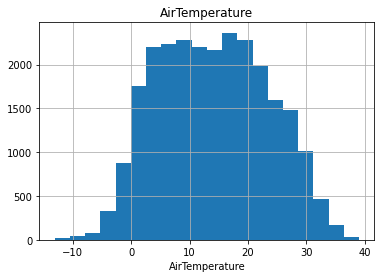

count    25560.000000
mean        13.514221
std          9.743065
min        -19.300000
5%          -1.400000
10%          0.700000
20%          3.900000
30%          7.000000
40%         10.300000
50%         13.400000
60%         16.800000
70%         19.800000
80%         23.100000
90%         26.700000
95%         29.000000
99%         32.100000
max         37.200000
Name: ComfortTemperature, dtype: float64


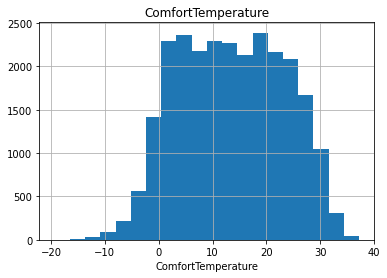

count    25560.000000
mean        53.686084
std         22.405899
min          1.600000
5%          17.900000
10%         22.900000
20%         31.700000
30%         39.700000
40%         47.000000
50%         54.200000
60%         61.100000
70%         68.100000
80%         75.400000
90%         83.710000
95%         88.900000
99%         96.000000
max        100.000000
Name: RelativeHumidity, dtype: float64


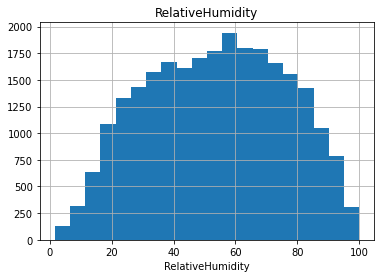

count    25560.000000
mean         1.672966
std          1.358169
min          0.000000
5%           0.000000
10%          0.500000
20%          0.500000
30%          0.800000
40%          1.000000
50%          1.500000
60%          1.500000
70%          2.100000
80%          2.600000
90%          3.600000
95%          4.100000
99%          5.700000
max         13.400000
Name: WindSpeed, dtype: float64


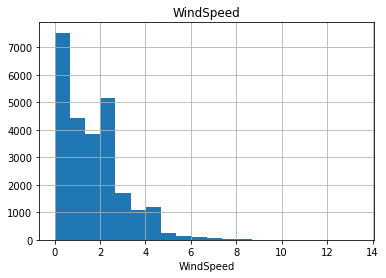

count    25560.000000
mean        86.913028
std        100.825143
min          0.000000
5%           0.000000
10%         10.000000
20%         20.000000
30%         20.000000
40%         30.000000
50%         30.000000
60%         40.000000
70%         80.000000
80%        197.000000
90%        240.000000
95%        310.000000
99%        360.000000
max        360.000000
Name: WindDirection, dtype: float64


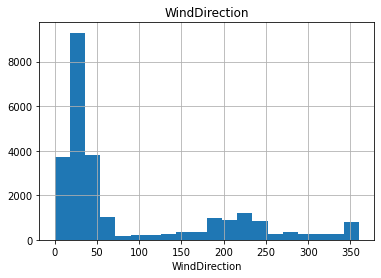

count    19306.000000
mean        12.867865
std         24.326202
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          2.000000
50%          3.000000
60%          4.000000
70%          5.000000
80%         10.000000
90%         60.000000
95%         80.000000
99%         95.000000
max         99.000000
Name: WWCode, dtype: float64


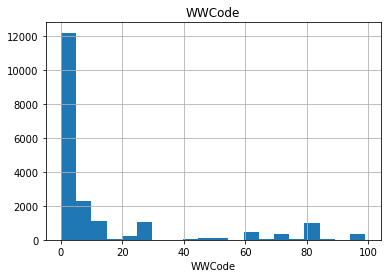

count    25560.000000
mean         2.573795
std          2.487385
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.800000
50%          2.000000
60%          3.000000
70%          4.400000
80%          5.300000
90%          6.000000
95%          6.600000
99%          7.600000
max          8.000000
Name: EffectiveCloudCover, dtype: float64


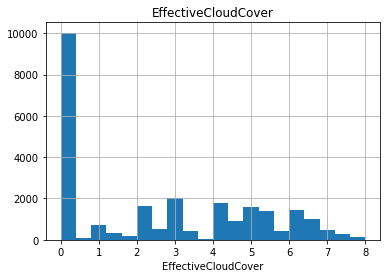

count    25560.000000
mean        89.724239
std        126.180117
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000008
40%          0.004766
50%          4.317082
60%         45.104586
70%        123.416827
80%        217.159787
90%        309.106589
95%        357.418576
99%        411.386473
max        456.319322
Name: Generation, dtype: float64


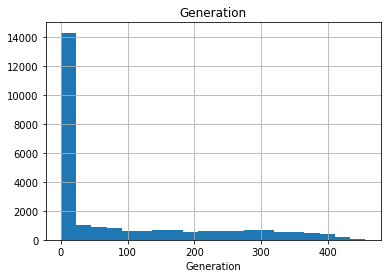

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

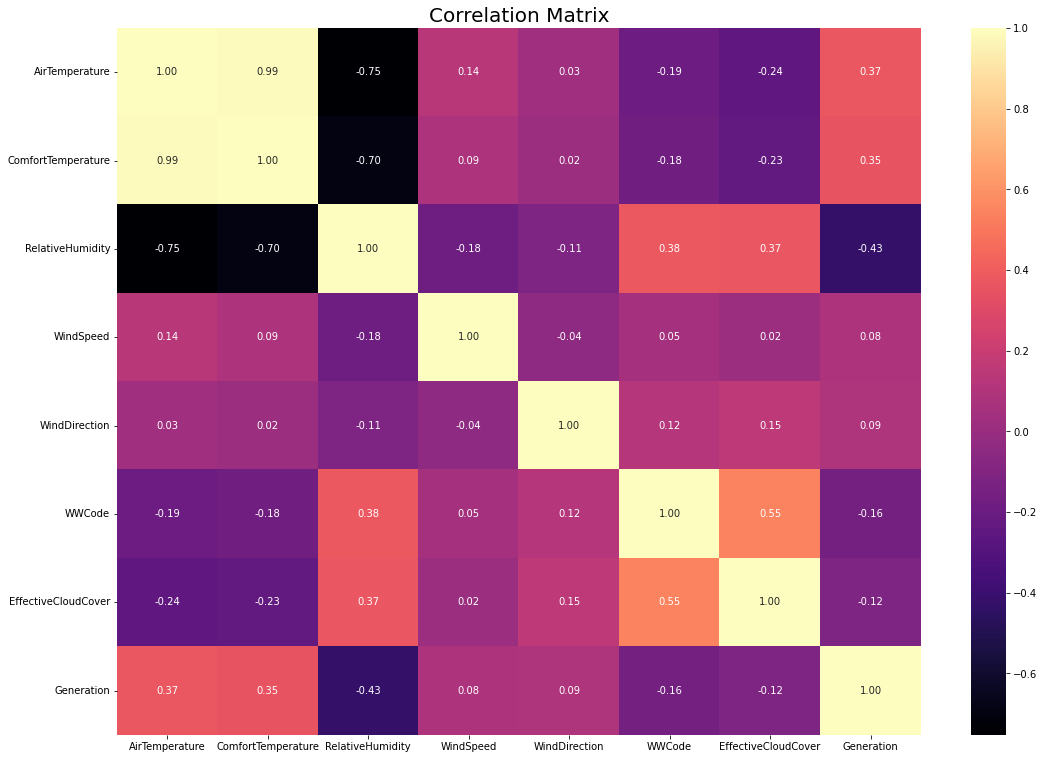

In [ ]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [ ]:
   
    df['hour'] = df['DateTime'].dt.hour
    df['dayofweek'] = df['DateTime'].dt.dayofweek
    df['quarter'] = df['DateTime'].dt.quarter
    df['month'] = df['DateTime'].dt.month
    df['year'] = df['DateTime'].dt.year
    df['dayofyear'] = df['DateTime'].dt.dayofyear
    df['dayofmonth'] = df['DateTime'].dt.day
    df['weekofyear'] = df['DateTime'].dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:


coordinates = [40.239, 33.029] # Ankara

df["Date"] = df["DateTime"].apply(pd.to_datetime).dt.date.apply(str)

sun = Sun(coordinates[0], coordinates[1])
tz =pytz.timezone('Europe/Istanbul')
df["issun"]= df[["Date","hour"]].apply(lambda x : sun.get_local_sunrise_time(pd.to_datetime(x["Date"]).date(),local_time_zone=tz).hour <= x["hour"] <= sun.get_local_sunset_time(pd.to_datetime(x["Date"]).date(),local_time_zone=tz).hour ,axis=1)


In [ ]:
df['WWCode'] = df['WWCode'].fillna(0).astype(int)

In [ ]:
df.loc[(df["WWCode"] >= 0 ) & (df["WWCode"] < 3 ), "WWCode_segment"] = "no_cloud"
df.loc[(df["WWCode"] > 4 ) & (df["WWCode"] < 9 ), "WWCode_segment"] = "Smoke_dusty"
df.loc[(df["WWCode"] > 9 ) & (df["WWCode"] < 19 ), "WWCode_segment"] = "Tornado_clouds"
df.loc[(df["WWCode"] > 19 ) & (df["WWCode"] < 29 ), "WWCode_segment"] = "Drizzle_rainy"
df.loc[(df["WWCode"] > 29 ) & (df["WWCode"] < 39 ), "WWCode_segment"] = "Duststorm"
df.loc[(df["WWCode"] > 39 ) & (df["WWCode"] < 49 ), "WWCode_segment"] = "Foggy"
df.loc[(df["WWCode"] > 49) & (df["WWCode"] < 59 ), "WWCode_segment"] = "Drizzle_not_freezing"
df.loc[(df["WWCode"] > 59 ) & (df["WWCode"] < 69 ), "WWCode_segment"] = "Rainy_freezing"
df.loc[(df["WWCode"] > 69 ) & (df["WWCode"] < 79 ), "WWCode_segment"] = "Falling_snow"
df.loc[(df["WWCode"] > 79 ) & (df["WWCode"] < 99 ), "WWCode_segment"] = "Snow_shower"

df.head(5)


,DateTime,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover,Generation,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Date,issun,WWCode_segment
0,2019-01-01 00:00:00,-1.7,-6.1,75.3,3.6,60.0,10,6.3,0.000000,0,1,1,1,2019,1,1,1,2019-01-01,False,Tornado_clouds
1,2019-01-01 01:00:00,-1.8,-5.3,75.3,2.6,70.0,10,4.5,0.000000,1,1,1,1,2019,1,1,1,2019-01-01,False,Tornado_clouds
2,2019-01-01 02:00:00,-2.0,-6.0,74.7,3.1,80.0,10,5.5,0.000008,2,1,1,1,2019,1,1,1,2019-01-01,False,Tornado_clouds
3,2019-01-01 03:00:00,-1.9,-5.9,76.4,3.1,60.0,10,7.6,0.000000,3,1,1,1,2019,1,1,1,2019-01-01,False,Tornado_clouds
4,2019-01-01 04:00:00,-2.0,-7.1,76.4,4.6,60.0,10,6.5,0.000008,4,1,1,1,2019,1,1,1,2019-01-01,False,Tornado_clouds


In [ ]:
df.loc[df.month.isin([3,4,5]), "date_season"] = "spring"
df.loc[df.month.isin([6,7,8]), "date_season"] = "summer"
df.loc[df.month.isin([9,10,11]), "date_season"] = "autumn"
df.loc[df.month.isin([1,2,12]), "date_season"] = "winter" #winter

In [ ]:
# rüzgar yönü

df.loc[df["WindDirection"] == 0, "NEW_WIND_DIRECTION"] = "Yıldız"
df.loc[(0 < df["WindDirection"]) & (df["WindDirection"] < 45), "NEW_WIND_DIRECTION"] = "Yıldız-Poyraz"
df.loc[df["WindDirection"] == 45, "NEW_WIND_DIRECTION"] = "Poyraz"
df.loc[(45 < df["WindDirection"]) & (df["WindDirection"] < 90), "NEW_WIND_DIRECTION"] = "Poyraz-Doğu"
df.loc[df["WindDirection"] == 90, "NEW_WIND_DIRECTION"] = "Doğu"
df.loc[(90 < df["WindDirection"]) & (df["WindDirection"] < 135), "NEW_WIND_DIRECTION"] = "Doğu-Keşişleme"
df.loc[df["WindDirection"] == 135, "NEW_WIND_DIRECTION"] = "Keşişleme"
df.loc[(135 < df["WindDirection"]) & (df["WindDirection"] < 180), "NEW_WIND_DIRECTION"] = "Keşişleme-Kıble"
df.loc[df["WindDirection"] == 180, "NEW_WIND_DIRECTION"] = "Kıble"
df.loc[(180 < df["WindDirection"]) & (df["WindDirection"] < 225), "NEW_WIND_DIRECTION"] = "Kıble-Lodos"
df.loc[df["WindDirection"] == 225, "NEW_WIND_DIRECTION"] = "Lodos"
df.loc[(225 < df["WindDirection"]) & (df["WindDirection"] < 270), "NEW_WIND_DIRECTION"] = "Lodos-Batı"
df.loc[df["WindDirection"] == 270, "NEW_WIND_DIRECTION"] = "Batı"
df.loc[(270 < df["WindDirection"]) & (df["WindDirection"] < 315), "NEW_WIND_DIRECTION"] = "Batı-Karayel"
df.loc[df["WindDirection"] == 315, "NEW_WIND_DIRECTION"] = "Karayel"
df.loc[(315 < df["WindDirection"]) & (df["WindDirection"] < 360), "NEW_WIND_DIRECTION"] = "Karayel-Yıldız"
df.loc[df["WindDirection"] == 360, "NEW_WIND_DIRECTION"] = "Yıldız"

# rüzgar hızı

df.loc[(0 <= df["WindSpeed"]) & (df["WindSpeed"] <= 2), "NEW_WIND_SPEED"] = "calm"
df.loc[(2 < df["WindSpeed"]) & (df["WindSpeed"] <= 6), "NEW_WIND_SPEED"] = "light"
df.loc[(6 < df["WindSpeed"]) & (df["WindSpeed"] <= 13), "NEW_WIND_SPEED"] = "light_breeze"
df.loc[(13 < df["WindSpeed"]) & (df["WindSpeed"] <= 21), "NEW_WIND_SPEED"] = "gentle_breeze"

In [ ]:
#sıcaklık

df.loc[df["AirTemperature"] <= -9, "NEW_AIR_TEMPERATURE"] = "extreme_cold"
df.loc[(-9 < df["AirTemperature"]) & (df["AirTemperature"] <= 0), "NEW_AIR_TEMPERATURE"] = "freezing"
df.loc[(0 < df["AirTemperature"]) & (df["AirTemperature"] < 7), "NEW_AIR_TEMPERATURE"] = "very_cold"
df.loc[(7 < df["AirTemperature"]) & (df["AirTemperature"] < 13), "NEW_AIR_TEMPERATURE"] = "cold"
df.loc[(13 < df["AirTemperature"]) & (df["AirTemperature"] < 18), "NEW_AIR_TEMPERATURE"] = "cool"
df.loc[(18 < df["AirTemperature"]) & (df["AirTemperature"] < 24), "NEW_AIR_TEMPERATURE"] = "comfortable "
df.loc[(24 < df["AirTemperature"]) & (df["AirTemperature"] < 29), "NEW_AIR_TEMPERATURE"] = "warm"
df.loc[(29 < df["AirTemperature"]) & (df["AirTemperature"] < 35), "NEW_AIR_TEMPERATURE"] = "hot"
df.loc[(35 < df["AirTemperature"]) & (df["AirTemperature"] < 40), "NEW_AIR_TEMPERATURE"] = "hot"

In [ ]:
df.head()

,DateTime,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover,Generation,hour,...,dayofyear,dayofmonth,weekofyear,Date,issun,WWCode_segment,date_season,NEW_WIND_DIRECTION,NEW_WIND_SPEED,NEW_AIR_TEMPERATURE
0,2019-01-01 00:00:00,-1.7,-6.1,75.3,3.6,60.0,10,6.3,0.000000,0,...,1,1,1,2019-01-01,False,Tornado_clouds,winter,Poyraz-Doğu,light,freezing
1,2019-01-01 01:00:00,-1.8,-5.3,75.3,2.6,70.0,10,4.5,0.000000,1,...,1,1,1,2019-01-01,False,Tornado_clouds,winter,Poyraz-Doğu,light,freezing
2,2019-01-01 02:00:00,-2.0,-6.0,74.7,3.1,80.0,10,5.5,0.000008,2,...,1,1,1,2019-01-01,False,Tornado_clouds,winter,Poyraz-Doğu,light,freezing
3,2019-01-01 03:00:00,-1.9,-5.9,76.4,3.1,60.0,10,7.6,0.000000,3,...,1,1,1,2019-01-01,False,Tornado_clouds,winter,Poyraz-Doğu,light,freezing
4,2019-01-01 04:00:00,-2.0,-7.1,76.4,4.6,60.0,10,6.5,0.000008,4,...,1,1,1,2019-01-01,False,Tornado_clouds,winter,Poyraz-Doğu,light,freezing


In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


num_cols=[col for col in num_cols if col not in "DateTime" ]

Observations: 25560
Variables: 24
cat_cols: 9
num_cols: 14
cat_but_car: 1
num_but_cat: 4


In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


In [ ]:
df=one_hot_encoder(df,cat_cols)

In [ ]:
#Outlier Detection


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py

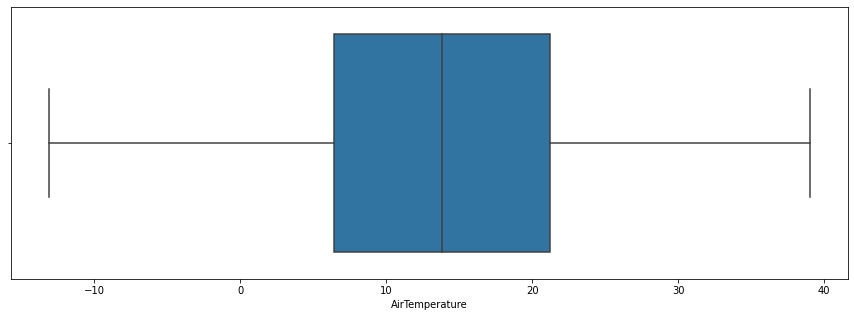

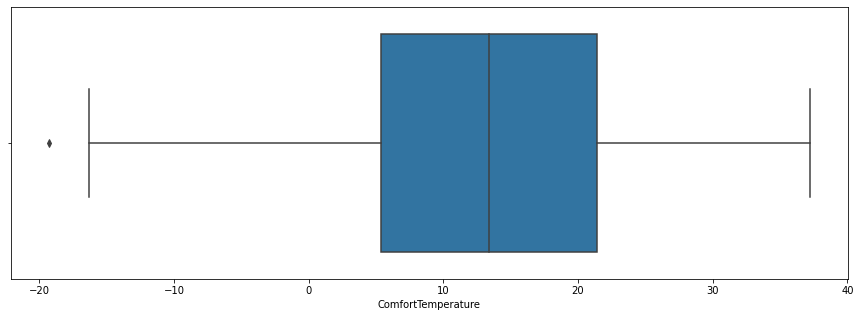

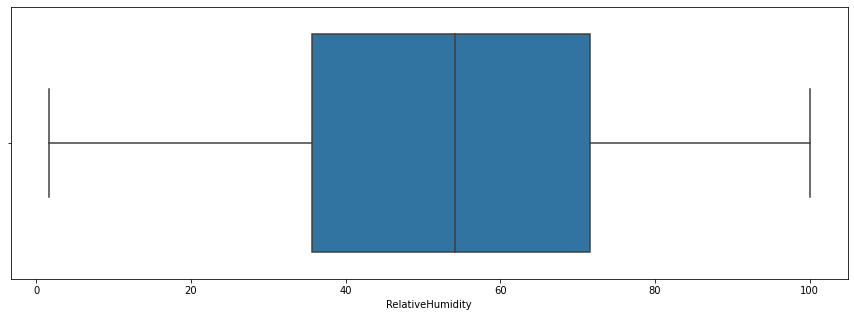

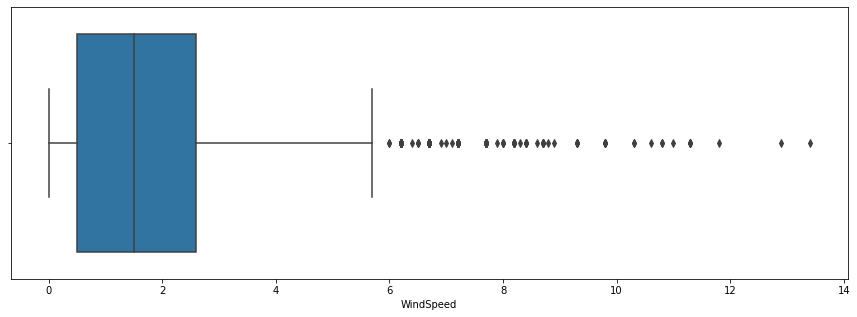

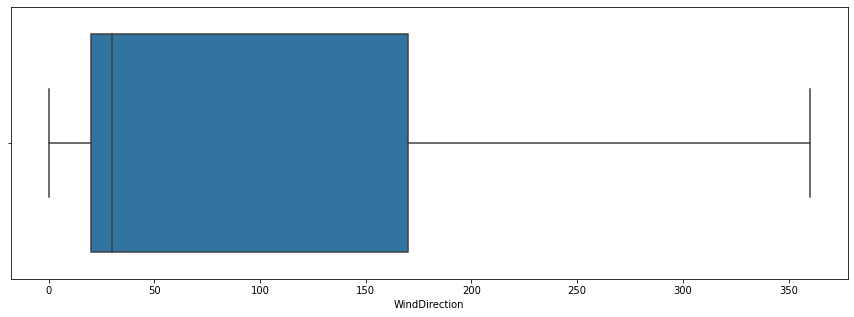

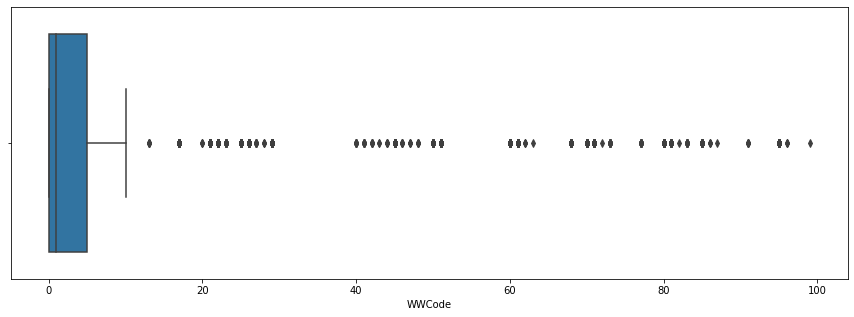

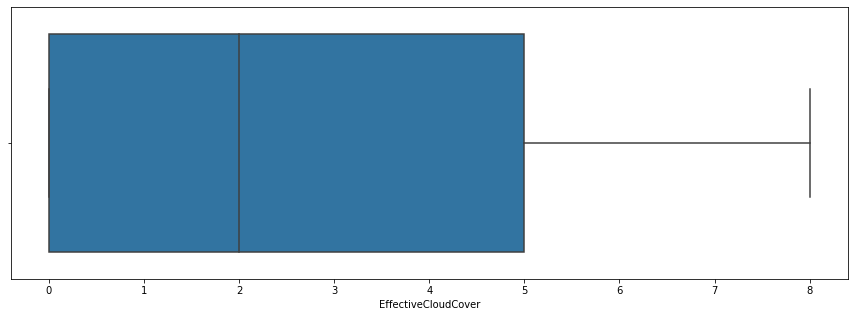

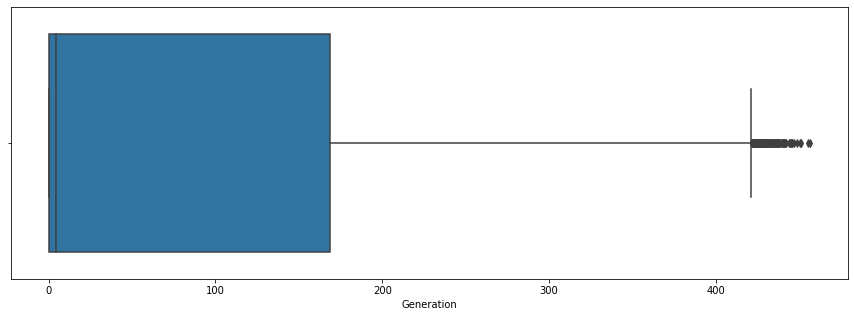

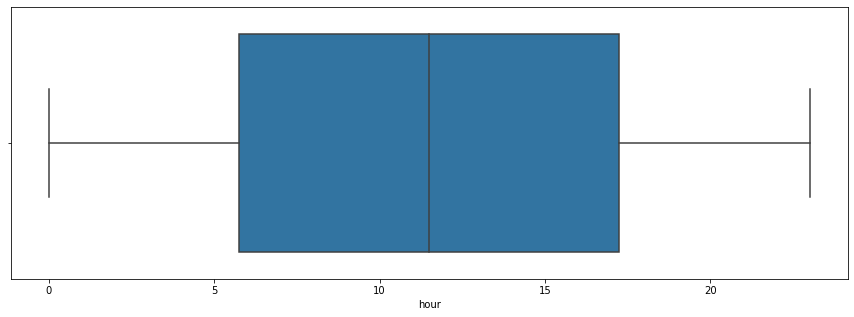

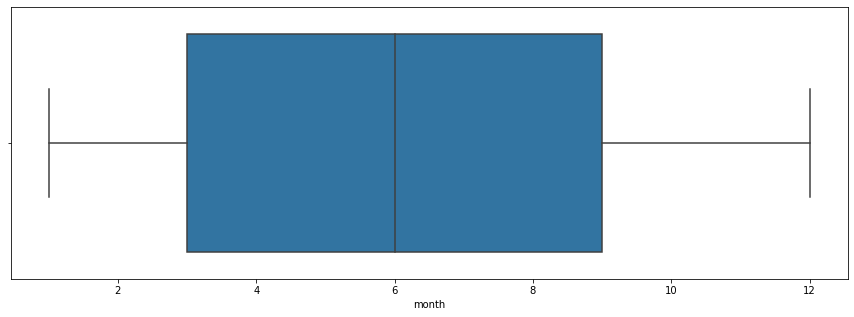

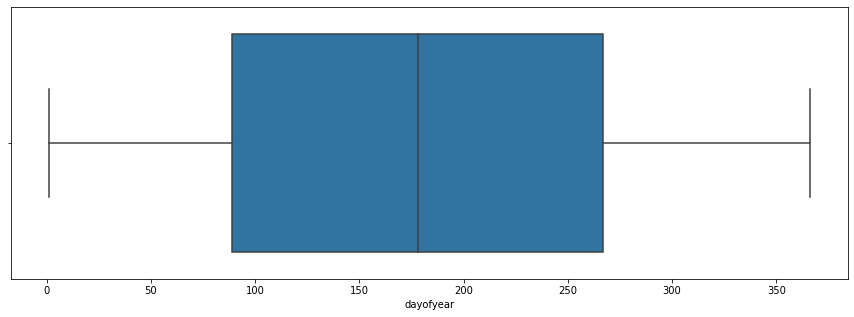

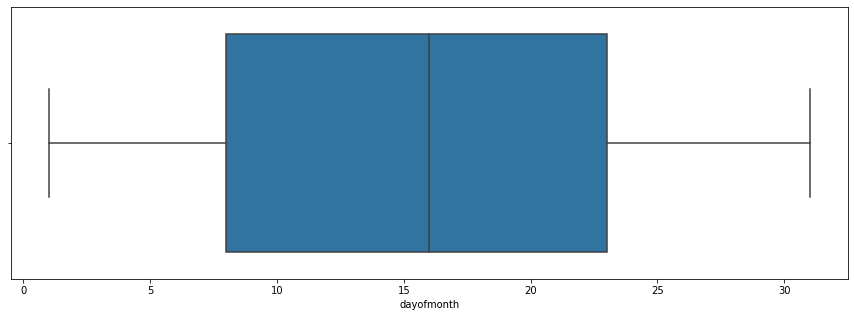

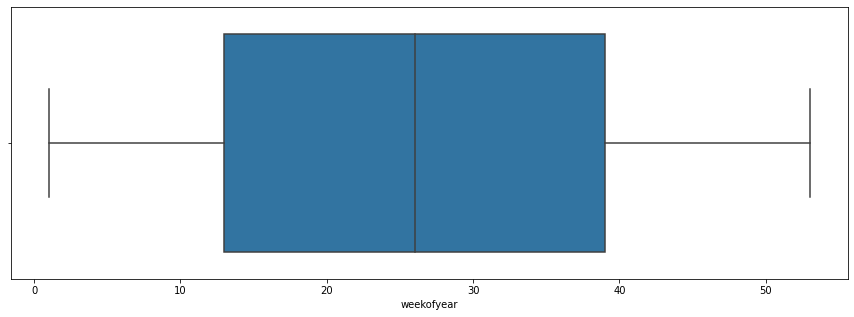

In [ ]:
for i in num_cols:
    plt.figure(figsize=(15,5))
    sns.boxplot(x = i, data = df, orient = "v")

In [ ]:
df_copy=df.copy()
df_copy.drop(['DateTime',"Date"],axis=1,inplace=True)

In [ ]:
df_copy.head()

,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover,Generation,hour,month,...,dayofweek_6,quarter_1,quarter_2,quarter_3,quarter_4,year_2019,year_2020,year_2021,issun_False,issun_True
0,-1.7,-6.1,75.3,3.6,60.0,10,6.3,0.000000,0,1,...,0,1,0,0,0,1,0,0,1,0
1,-1.8,-5.3,75.3,2.6,70.0,10,4.5,0.000000,1,1,...,0,1,0,0,0,1,0,0,1,0
2,-2.0,-6.0,74.7,3.1,80.0,10,5.5,0.000008,2,1,...,0,1,0,0,0,1,0,0,1,0
3,-1.9,-5.9,76.4,3.1,60.0,10,7.6,0.000000,3,1,...,0,1,0,0,0,1,0,0,1,0
4,-2.0,-7.1,76.4,4.6,60.0,10,6.5,0.000008,4,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
num_cols=[col for col in num_cols if col not in "Generation"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
scaler = StandardScaler()
df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])

In [ ]:
df_copy.head()

,AirTemperature,ComfortTemperature,RelativeHumidity,WindSpeed,WindDirection,WWCode,EffectiveCloudCover,Generation,hour,month,...,dayofweek_6,quarter_1,quarter_2,quarter_3,quarter_4,year_2019,year_2020,year_2021,issun_False,issun_True
0,-1.681758,-2.013186,0.964672,1.418875,-0.266933,0.012842,1.498070,0.000000,-1.661325,-1.592217,...,0,1,0,0,0,1,0,0,1,0
1,-1.692459,-1.931075,0.964672,0.682575,-0.167749,0.012842,0.774405,0.000000,-1.516862,-1.592217,...,0,1,0,0,0,1,0,0,1,0
2,-1.713862,-2.002922,0.937893,1.050725,-0.068566,0.012842,1.176441,0.000008,-1.372399,-1.592217,...,0,1,0,0,0,1,0,0,1,0
3,-1.703160,-1.992659,1.013767,1.050725,-0.266933,0.012842,2.020718,0.000000,-1.227936,-1.592217,...,0,1,0,0,0,1,0,0,1,0
4,-1.713862,-2.115826,1.013767,2.155174,-0.266933,0.012842,1.578478,0.000008,-1.083473,-1.592217,...,0,1,0,0,0,1,0,0,1,0


count    2.556000e+04
mean     1.334353e-17
std      1.000020e+00
min     -2.901699e+00
5%      -1.521239e+00
10%     -1.307215e+00
20%     -9.754762e-01
30%     -6.544390e-01
40%     -3.441030e-01
50%     -2.306586e-02
60%      3.086726e-01
70%      5.976060e-01
80%      9.400457e-01
90%      1.378797e+00
95%      1.635626e+00
99%      2.052975e+00
max      2.673646e+00
Name: AirTemperature, dtype: float64


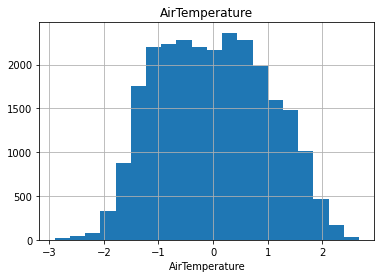

count    2.556000e+04
mean     4.447842e-18
std      1.000020e+00
min     -3.368023e+00
5%      -1.530783e+00
10%     -1.315240e+00
20%     -9.867952e-01
30%     -6.686139e-01
40%     -3.299049e-01
50%     -1.172359e-02
60%      3.372494e-01
70%      6.451668e-01
80%      9.838759e-01
90%      1.353377e+00
95%      1.589447e+00
99%      1.907628e+00
max      2.431087e+00
Name: ComfortTemperature, dtype: float64


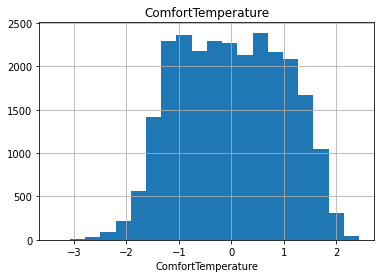

count    2.556000e+04
mean     2.624227e-16
std      1.000020e+00
min     -2.324705e+00
5%      -1.597204e+00
10%     -1.374044e+00
20%     -9.812824e-01
30%     -6.242266e-01
40%     -2.984131e-01
50%      2.293710e-02
60%      3.308977e-01
70%      6.433216e-01
80%      9.691350e-01
90%      1.340027e+00
95%      1.571667e+00
99%      1.888554e+00
max      2.067082e+00
Name: RelativeHumidity, dtype: float64


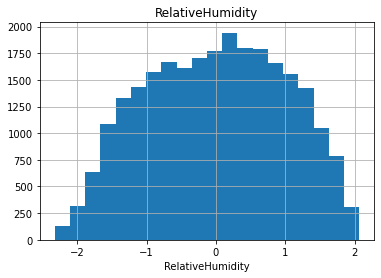

count    2.556000e+04
mean    -3.113489e-16
std      1.000020e+00
min     -1.231804e+00
5%      -1.231804e+00
10%     -8.636541e-01
20%     -8.636541e-01
30%     -6.427642e-01
40%     -4.955043e-01
50%     -1.273545e-01
60%     -1.273545e-01
70%      3.144253e-01
80%      6.825751e-01
90%      1.418875e+00
95%      1.787025e+00
99%      2.965104e+00
max      8.634611e+00
Name: WindSpeed, dtype: float64


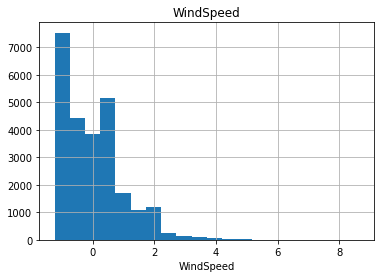

count    2.556000e+04
mean     4.447842e-18
std      1.000020e+00
min     -8.620343e-01
5%      -8.620343e-01
10%     -7.628507e-01
20%     -6.636672e-01
30%     -6.636672e-01
40%     -5.644836e-01
50%     -5.644836e-01
60%     -4.653001e-01
70%     -6.856587e-02
80%      1.091882e+00
90%      1.518371e+00
95%      2.212656e+00
99%      2.708574e+00
max      2.708574e+00
Name: WindDirection, dtype: float64


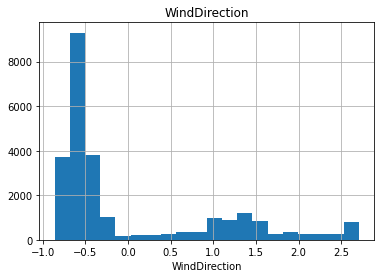

count    2.556000e+04
mean    -7.783723e-18
std      1.000020e+00
min     -4.447629e-01
5%      -4.447629e-01
10%     -4.447629e-01
20%     -4.447629e-01
30%     -4.447629e-01
40%     -4.447629e-01
50%     -3.990024e-01
60%     -3.532419e-01
70%     -2.617209e-01
80%     -1.702000e-01
90%      7.450096e-01
95%      3.216076e+00
99%      3.902483e+00
max      4.085525e+00
Name: WWCode, dtype: float64


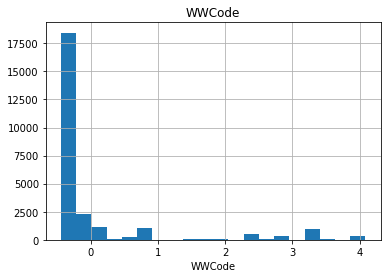

count    2.556000e+04
mean    -1.156439e-16
std      1.000020e+00
min     -1.034760e+00
5%      -1.034760e+00
10%     -1.034760e+00
20%     -1.034760e+00
30%     -1.034760e+00
40%     -7.131303e-01
50%     -2.306865e-01
60%      1.713500e-01
70%      7.342011e-01
80%      1.096034e+00
90%      1.377459e+00
95%      1.618681e+00
99%      2.020718e+00
max      2.181532e+00
Name: EffectiveCloudCover, dtype: float64


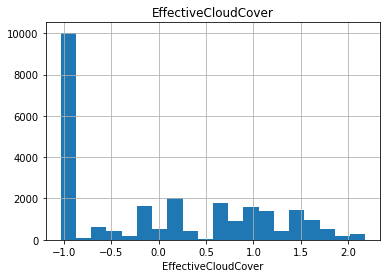

count    2.556000e+04
mean     2.779901e-19
std      1.000020e+00
min     -1.661325e+00
5%      -1.516862e+00
10%     -1.372399e+00
20%     -1.083473e+00
30%     -6.500836e-01
40%     -3.611576e-01
50%      0.000000e+00
60%      3.611576e-01
70%      6.500836e-01
80%      1.083473e+00
90%      1.372399e+00
95%      1.516862e+00
99%      1.661325e+00
max      1.661325e+00
Name: hour, dtype: float64


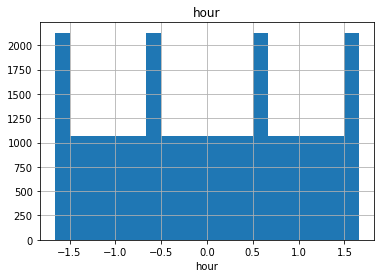

count    2.556000e+04
mean     2.668705e-17
std      1.000020e+00
min     -1.592217e+00
5%      -1.592217e+00
10%     -1.295296e+00
20%     -9.983764e-01
30%     -7.014563e-01
40%     -4.045362e-01
50%     -1.076161e-01
60%      4.862241e-01
70%      7.831442e-01
80%      1.080064e+00
90%      1.376984e+00
95%      1.673904e+00
99%      1.673904e+00
max      1.673904e+00
Name: month, dtype: float64


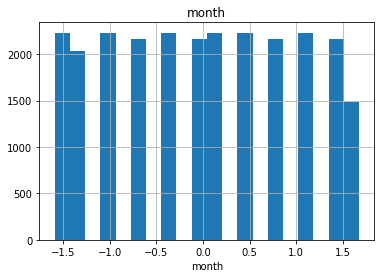

count    2.556000e+04
mean    -1.067482e-16
std      1.000020e+00
min     -1.721377e+00
5%      -1.556337e+00
10%     -1.381589e+00
20%     -1.034033e+00
30%     -6.923030e-01
40%     -3.466893e-01
50%     -3.017306e-03
60%      3.406547e-01
70%      6.862684e-01
80%      1.027999e+00
90%      1.375554e+00
95%      1.560011e+00
99%      1.773592e+00
max      1.822134e+00
Name: dayofyear, dtype: float64


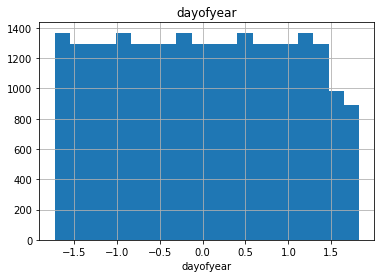

count    2.556000e+04
mean     5.337410e-17
std      1.000020e+00
min     -1.673842e+00
5%      -1.560168e+00
10%     -1.332819e+00
20%     -9.917960e-01
30%     -6.507727e-01
40%     -3.097494e-01
50%      3.127381e-02
60%      3.722971e-01
70%      7.133203e-01
80%      1.054344e+00
90%      1.395367e+00
95%      1.509041e+00
99%      1.736390e+00
max      1.736390e+00
Name: dayofmonth, dtype: float64


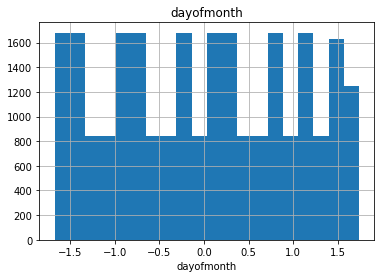

count    2.556000e+04
mean     1.601223e-16
std      1.000020e+00
min     -1.693513e+00
5%      -1.557848e+00
10%     -1.354352e+00
20%     -1.015191e+00
30%     -6.760294e-01
40%     -3.368682e-01
50%      2.292920e-03
60%      3.414541e-01
70%      6.806152e-01
80%      1.019776e+00
90%      1.358938e+00
95%      1.562434e+00
99%      1.765931e+00
max      1.833763e+00
Name: weekofyear, dtype: float64


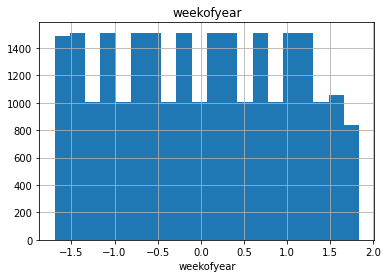

In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df_copy, col, plot=True)

In [ ]:
#Model Evolution
X=df_copy.drop("Generation",axis=1)
y=df_copy[["Generation"]]


In [ ]:
X.dtypes

AirTemperature        float64
ComfortTemperature    float64
RelativeHumidity      float64
WindSpeed             float64
WindDirection         float64
                       ...   
year_2019               uint8
year_2020               uint8
year_2021               uint8
issun_False             uint8
issun_True              uint8
Length: 69, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics

def base_models(X, y, scoring="r2"):
    print("Base Models....")
    classifiers = [#('LR', LogisticRegression()),
    #                ('KNN', KNeighborsClassifier()),
    #                ("SVC", SVC()),
    #                ("CART", DecisionTreeClassifier()),
    #                ("RF", RandomForestClassifier()),
    #                ('Adaboost', AdaBoostClassifier()),
    #                ('GBM', GradientBoostingClassifier()),
                  #  ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   # ('CatBoost', CatBoostClassifier(verbose=False))  #uzun sürdüğünden comment lendi
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")
        # r2 = metrics.r2_score(y_test, y_pred)
        # print("R2 ",r2)
        # # Cross-validate the linear regression using (negative) MSE
        # print("MSE ",mean_squared_error(y_test, y_pred))
        # print("RMSE ",mean_squared_error(y_test, y_pred, squared=True))



In [ ]:
base_models(X, y, scoring="r2")

Base Models....
r2: nan (LightGBM) 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/sklearn.py", line 923, in fit
    _LGBMCheckClassificationTargets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceba

In [ ]:
from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [ ]:
print(type(y_train))
print(y_train.dtypes)
y_series = y_train.squeeze()
x_series=X_train.squeeze()
X_test_series=X_test.squeeze()
y_test_series=y_test.squeeze()
y_train.head()

<class 'pandas.core.frame.DataFrame'>
Generation    float64
dtype: object


,Generation
120,0.000000
6975,145.359906
1756,0.000008
3166,0.000000
2074,220.941836


In [ ]:
from flaml import AutoML 
automl_clf = AutoML()
automl_clf.fit(x_series, y_series, task="regression") 

[flaml.automl: 09-23 19:12:04] {2600} INFO - task = regression
INFO:flaml.automl:task = regression
[flaml.automl: 09-23 19:12:04] {2602} INFO - Data split method: uniform
INFO:flaml.automl:Data split method: uniform
[flaml.automl: 09-23 19:12:04] {2605} INFO - Evaluation method: holdout
INFO:flaml.automl:Evaluation method: holdout
[flaml.automl: 09-23 19:12:04] {2727} INFO - Minimizing error metric: 1-r2
INFO:flaml.automl:Minimizing error metric: 1-r2
[flaml.automl: 09-23 19:12:04] {2778} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
INFO:flaml.default.suggest:metafeature distance: 6.666739584347735
INFO:flaml.default.suggest:metafeature distance: 3.636376119336741
INFO:flaml.default.suggest:metafeature distance: 8.000011445579789
INFO:flaml.default.suggest:metafeature distance: 2.6666826983458005
INFO:flaml.default.suggest:m

In [ ]:
import lightgbm
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

model_xgb=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=0.8530103446108747, gamma=0,
             gpu_id=-1, grow_policy='lossguide', importance_type='gain',
             interaction_constraints='', learning_rate=0.06319487455916348,
             max_delta_step=0, max_depth=0, max_leaves=357,
             min_child_weight=79.0269954377818,
             monotone_constraints='()', n_estimators=675, n_jobs=-1,
             num_parallel_tree=1, random_state=0, reg_alpha=0.01792735974319558,
             reg_lambda=1.6037247708252034, scale_pos_weight=1, subsample=1.0,
             tree_method='hist', use_label_encoder=False, validate_parameters=1,
             verbosity=0)
model_xgb.fit(x_series,y_series)

y_pred = model_xgb.predict(X_test_series)
r2 = metrics.r2_score(y_test_series, y_pred)
print("R2 ",r2)
print("RMSE ",mean_squared_error(y_test_series, y_pred, squared=True))
print('MAE: %.3f' % results.best_score_)


XGBoostError: ignored

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold

def Lassoreg():
    model = Lasso(alpha=1.0)
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define grid
    grid = dict()
    grid['alpha'] = np.arange(0, 1, 0.01)
    # define search
    search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # perform the search
    results = search.fit(x_series, y_series)
    y_pred = search.predict(X_test_series)
    r2 = metrics.r2_score(y_test_series, y_pred)
    print("R2 ",r2)
    # summarize
    print("RMSE ",mean_squared_error(y_test_series, y_pred, squared=True))
    print('MAE: %.3f' % results.best_score_)
    print('Config: %s' % results.best_params_)
Lassoreg()

In [ ]:
#feature importance 
indep_cols=[]
X = df.iloc[:,[indep_cols]] #independent columns
y = df.iloc[:,8]    #target column i.e generation
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X,y)
# get importance
importance = model.feature_importances_
importance
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
xgboost_model = XGBClassifier(random_state=17, use_label_encoder=False)
xgboost_model.get_params()

In [ ]:
from sklearn.model_selection import cross_validate, GridSearchCV
cv_results = cross_validate(xgboost_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])

In [ ]:
!pip install flaml

In [ ]:
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 500, 1000],
                  "colsample_bytree": [0.7, 1]}

In [ ]:
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

In [ ]:
df.head()